# Task 4a+b

### 1. PCA Estimation
#### 1a. Load the Data: Use scipy.io.loadmat to load your data from the .mat file.



In [1]:
import scipy.io
import numpy as np

data = scipy.io.loadmat('faces.mat')
matrix_X = data['X']
print(matrix_X.shape)

(339, 40)


#### 1b. Perform PCA:



In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.9, svd_solver='auto')  # Up to 40 components
pca.fit(matrix_X.T)

PCA(n_components=0.9)

### 2. Plot Mean Face and Principal Components

#### 2a. Mean Face:

In [3]:
mean_face = np.mean(matrix_X, axis=1)
print(mean_face.shape)

(339,)


#### 2b. Principal Components:
The principal components are stored in pca.components_. These represent variations along each eigenface.



In [4]:
principal_components = pca.components_.T
print(principal_components.shape)

(339, 6)


### 3. Plot the Mean Face and First 3 Principal Components:
Use a plotting library like matplotlib to visualize. If the points represent 3D coordinates, plot them as a 3D scatter plot.



In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

def plot_face(face_points, title="Face"):
  # fig = plt.figure()
  # ax = fig.add_subplot(111, projection='3d')
  # ax.scatter(face_points[:113], face_points[113:226], face_points[226:])
  # plt.title(title)
  # plt.show()

  x = face_points[:113]
  y = face_points[113:226]
  z = face_points[226:]
  fig = px.scatter_3d(x=x, y=y, z=z, opacity=0.3)
  fig.show()

plot_face(mean_face, title="Mean Face")
for i in range(3):
  plot_face(mean_face + principal_components[:, i], title=f"PC {i+1}")


# Task 4c

### Create New Faces


In [6]:
def generate_faces(generated_faces, M):
  alphas = np.random.randn(M)
  new_face = mean_face + sum(alpha_k * principal_components[:, k] for k, alpha_k in enumerate(alphas[:M]))
  print(new_face.shape)
  generated_faces.append(new_face)

generated_faces = []
nr_of_faces = 3
nr_of_components = 5

for i in range(nr_of_faces):
  generate_faces(generated_faces, nr_of_components)

print(len(generated_faces))


(339,)
(339,)
(339,)
3


# Task 4d


In [7]:
from numpy.linalg import inv

K = 3  # Choose K less than M
D = 339
face_index = 0
U = principal_components[:, :K]
# print(U.shape)

f_new = generated_faces[face_index][:D]
# print(f_new.shape)
A = inv(np.dot(U.T, U))
B = np.dot(U.T, f_new - mean_face)
alpha = np.dot(A, B)

# Compute Approximation:
f_approx = mean_face + np.dot(U, alpha)
print(f_approx.shape)

# Compute the Error:
error = np.linalg.norm(f_approx - f_new)**2
print(f"Error: {error}")

# Plot the original face and the approximated face
plot_face(f_new, title="New Face")
plot_face(f_approx, title="Original Face")




(339,)
Error: 0.7081445818786999


In [8]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
# print(explained_variance)
components_needed = np.where(explained_variance >= 0.9)[0][0] + 1
print(f"Components needed to preserve 90% variance: {components_needed}")


Components needed to preserve 90% variance: 6


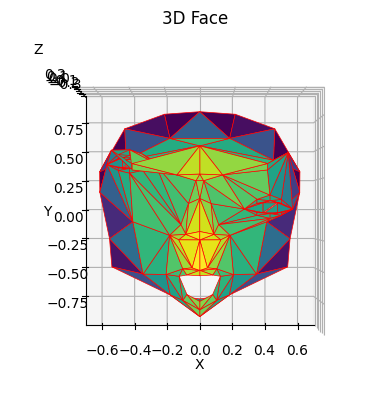

In [9]:
triangles = scipy.io.loadmat('triangles.mat')['tri']
# print(triangles)

def plot_face_mesh(face_points, triangles, title, elev=0, azim=0):
  # Extract x, y, z coordinates from the face points
  x = face_points[:113]  # Extract x-coordinates
  y = face_points[113:226]  # Extract y-coordinates
  z = face_points[226:]  # Extract z-coordinates

  # Adjust triangles to 0-indexed (Python standard)
  triangles_0_indexed = triangles - 1  # Convert from 1-indexed to 0-indexed

  # Create a 3D plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  # Plot the surface using the triangular mesh
  ax.plot_trisurf(x, y, z, triangles=triangles_0_indexed, edgecolor='r', linewidth=0.5, cmap='viridis')

  # Set plot labels and title
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title(title)

  # Set the view angle (elev and azim)
  ax.view_init(elev=elev, azim=azim)

  # Show plot
  plt.show()

plot_face_mesh(f_new, triangles, title="3D Face", elev=90, azim=-90)

